In [1]:
import time
import math
import pyautogui
import pyperclip
import requests
import quopri
import urllib.parse
import pandas as pd
import os
import psycopg2
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup
from io import BytesIO
from scipy.stats import multivariate_normal
from scipy.stats import norm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import BayesianRidge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings

# 1.Data Collection

#### (1). Download webpages

In [2]:
def auto_download(url,file_name):
    pyautogui.hotkey('ctrl', '2') # switch Google Chrome tabs
    time.sleep(1)
    pyautogui.click(207,55) # click the browser's address bar.
    time.sleep(0.5)
    pyautogui.hotkey('ctrl', 'a') # select all document content.
    pyperclip.copy(url) # copy the url
    time.sleep(0.5)
    pyautogui.hotkey('ctrl', 'v') # paste the url
    time.sleep(0.5)
    pyautogui.hotkey('enter') # access the url
    time.sleep(20)
    pyautogui.hotkey('ctrl', 's') # save the page to local path
    time.sleep(2)
    pyperclip.copy(file_name) # copy the file name
    pyautogui.hotkey('ctrl', 'v') # paste the file name
    time.sleep(2)
    pyautogui.hotkey('enter') # save the page with given name

In [3]:
def download_page(school,pages):
    url_base = f"https://www.liuxue315.cn/dingwei/assess/?applyDegree=%E7%A1%95%E5%A3%AB&country=%E7%BE%8E%E5%9B%BD&applySchool="
    url_school = urllib.parse.quote(school)
    url_page = "&page="
    for i in range(1,pages + 1):
        url = url_base + url_school + url_page + str(i)
        file_name = school + str(i)
        auto_download(url, file_name)

def find_first_digit(s):
    for i in range(len(s)):
        if s[i].isdigit():
            return i

In [4]:
# This operation has already been performed
# https://www.liuxue315.cn/dingwei/assess/?applyDegree=%E7%A1%95%E5%A3%AB&country=%E7%BE%8E%E5%9B%BD&applySchool=%E5%AE%BE%E5%A4%95%E6%B3%95%E5%B0%BC%E4%BA%9A%E5%A4%A7%E5%AD%A6&page=13 is the Chinese name of Lehigh University.
# I have to use chinese characters because the URL is based on chinese names of universities.

ll = 
[
['普林斯顿大学',4],
['麻省理工学院',12],
['哈佛大学',14],
['斯坦福大学',14],
['耶鲁大学',11],
['宾夕法尼亚大学',20],
['加州理工学院',2],
['杜克大学',20],
['布朗大学',15],
['约翰霍普金斯大学',20],
['西北大学',20],
['哥伦比亚大学',20],
['康奈尔大学',20],
['芝加哥大学',20],
['加州大学伯克利分校',20],
['加州大学洛杉矶分校',7],
['莱斯大学',14],
['达特茅斯学院',4],
['范德堡大学',18],
['圣母大学',5],
['密歇根大学-安娜堡分校',20],
['乔治城大学',20],
['北卡罗来纳大学教堂山分校',8],
['卡内基梅隆大学',20],
['埃默里大学',17],
['弗吉尼亚大学',17],
['圣路易斯华盛顿大学',20],
['加州大学戴维斯分校',20],
['加州大学圣地亚哥分校',10],
['佛罗里达大学',20],
['南加州大学',20],
['德克萨斯大学奥斯汀分校',16],
['佐治亚理工学院',20],
['加州大学欧文分校',20],
['纽约大学',20],
['加州大学圣巴巴拉分校',6],
['伊利诺伊大学香槟分校',20],
['威斯康星大学麦迪逊分校',19],
['波士顿学院',16],
['罗格斯大学',20],
['塔夫茨大学',9],
['华盛顿大学',50],
['波士顿大学',20],
['俄亥俄州立大学',20],
['普渡大学',20],
['马里兰大学',20],
['里海大学',19],
['佐治亚大学',8],
['罗彻斯特大学',20],
['弗吉尼亚理工大学',7],
['凯斯西储大学',20],
['佛罗里达州立大学',7],
['东北大学',20],
['明尼苏达大学双城分校',19],
['威廉玛丽学院',6],
['纽约州立大学石溪分校',13],
['康涅狄格大学',16],
['布兰迪斯大学',20],
['密歇根州立大学',17],
['北卡罗拉娜州立大学',10],
['宾州州立大学',26],
['伦斯勒理工学院',12],
['乔治华盛顿大学',20],
['雪城大学',20],
['马萨诸塞大学安姆斯特分校',6],
['迈阿密大学',20],
['匹兹堡大学',20],
['纽约州立大学宾厄姆顿分校',6],
['印第安纳大学伯明顿分校',10],
['杜兰大学',20],
['佩波戴恩大学',25],
['斯蒂文斯理工学院',20],
['纽约州立大学水牛城分校',17],
['加州大学河滨分校',7],
['特拉华大学',13],
['加州大学圣克鲁兹分校',3],
['伊利诺伊大学芝加哥分校',4],
['伍斯特理工学院',23],
['克莱姆森大学',10],
['马凯特大学',7],
['新泽西理工学院',13],
['福特汉姆大学',20],
['南卫理公会大学',9],
['天普大学',7],
['南佛罗里达大学',5],
['奥本大学',8],
['爱荷华大学',6],
['德雷塞尔大学',17],
['伊利诺伊理工大学',20],
['罗彻斯特理工学院',5],
['俄勒冈大学',3],
['美国大学',6],
['亚利桑那州立大学',12],
['乔治梅森大学',3],
['科罗拉多大学博尔多分校',3],
['亚利桑那大学',6],
['旧金山大学',5],
['德克萨斯大学达拉斯分校',16],
['犹他大学',3],
['克拉克大学',16]
]

for i in ll:
    download_page(i[0],i[1]) 

#### (2). Scrape data from local webpages

In [5]:
def scrape_data(path):
    # define the list to store the raw data
    info = []
    for filename in os.listdir(folder_path):
        # scrape the webpages
        # open and read the local MHTML file
        full_path = os.path.join(path, filename)
        with open(full_path, 'r', encoding='utf-8') as file:
            content = file.read()
        # parse the file content with BeautifulSoup
        soup = BeautifulSoup(content, 'html.parser')
        # find the tbody tag
        tbody = soup.find('tbody')

        #store the information in the info list
        for row in tbody.find_all('tr'):
            #
            column_info = []
            columns = row.find_all('td')
            column_data = [col.text.strip() for col in columns]
            if column_data:
                info.append(column_data[:-1] + [filename[:find_first_digit(filename)]])
    return info

In [6]:
# scrape the data and store in the list
folder_path = r'C:\Users\Administrator\Desktop\Study Abroad\course\DSCI431\data product\Universities\pages'
raw_data = scrape_data(folder_path)

In [7]:
len(raw_data)

14099

In [8]:
raw_data

[['50936',
  'Z=E5=90=8C=E5=AD=A6',
  '=E6=9C=AC=E7=A7=91',
  '3.2',
  '=\n             TOEFL:81',
  '=E5=9B=BD=E5=86=85=E4=BA=8C=E6=9C=AC=E9=99=A2=\n=E6=A0=A1',
  '=E4=BC=9A=E8=AE=A1=E5=AD=A6',
  '=\n                                                                           =\n                      =E7=BE=8E=E5=9B=BD=E5=A4=A7=E5=AD=A6\n                                                                           =',
  '=E4=BC=9A=\n=E8=AE=A1=E5=AD=A6',
  '=E7=A1=95=E5=A3=\n=AB',
  'American University'],
 ['46956',
  '=E9=A9=AC',
  '=E6=9C=AC=E7=A7=91',
  '3.75',
  '=',
  'University of Arizona',
  '=E4=BC=9A=E8=AE=A1=E5=AD=A6',
  '=\n                                                                           =\n                      =E7=BE=8E=E5=9B=BD=E5=A4=A7=E5=AD=A6\n                                                                           =\n                                                                           =\n                                                                  

# 2. Data Cleaning

#### (1). Reformat datasets

In [9]:
df = pd.DataFrame(raw_data)

In [10]:
# define the column names
df.columns = ["ID","Name","Degree","GPA","Tests","Undergrad_school","Major","App_schools","App_major","App_degree","App_school"]

In [11]:
df.head()

,ID,Name,Degree,GPA,Tests,Undergrad_school,Major,App_schools,App_major,App_degree,App_school
0,50936,Z=E5=90=8C=E5=AD=A6,=E6=9C=AC=E7=A7=91,3.2,=\n TOEFL:81,=E5=9B=BD=E5=86=85=E4=BA=8C=E6=9C=AC=E9=99=A2=...,=E4=BC=9A=E8=AE=A1=E5=AD=A6,=\n ...,=E4=BC=9A=\n=E8=AE=A1=E5=AD=A6,=E7=A1=95=E5=A3=\n=AB,American University
1,46956,=E9=A9=AC,=E6=9C=AC=E7=A7=91,3.75,=,University of Arizona,=E4=BC=9A=E8=AE=A1=E5=AD=A6,=\n ...,=E4=BC=9A=\n=E8=AE=A1=E5=AD=A6\n ...,=E7=A1=95=E5=A3=\n=AB\n ...,American University
2,45350,=E5=90=B4=E5=90=8C=E5=AD=A6,=E6=9C=AC=E7=A7=91,3.33,=\n GMAT:710\n ...,=E6=9A=A8=E5=8D=97=E5=A4=A7=E5=AD=A6,=E8=A1=8C=E6=94=BF=E7=AE=A1=E7=90=86,=\n ...,=E5=85=AC=\n=E5=85=B1=E7=AE=A1=E7=90=86\n ...,=E7=A1=95=E5=A3=\n=AB\n ...,American University
3,43576,=E7=AB=A5=E5=90=8C=E5=AD=A6,=E6=9C=AC=E7=A7=91,3.3,=\n TOEFL:84,=E6=B5=99=E6=B1=9F=E5=B8=88=E8=8C=83=E5=A4=A7=...,=E7=A7=91=E5=AD=A6=E6=95=99=E8=82=B2,=\n ...,=E6=95=99=\n=E8=82=B2=E5=AD=A6\n ...,=E7=A1=95=E5=A3=\n=AB\n ...,American University
4,42389,WYL,=E6=9C=AC=E7=A7=91,3.57,=\n TOEFL:90\n ...,=E6=B5=99=E6=B1=9F=E8=B4=A2=E7=BB=8F=E5=A4=A7=...,=E4=BC=9A=E8=AE=A1=E5=AD=A6,=\n ...,=E4=BC=9A=\n=E8=AE=A1=E5=AD=A6\n ...,=E7=A1=95=E5=A3=\n=AB\n ...,American University


In [12]:
## convert URL-encoded string to chinese words (Chinese)
def transfer_url_to_utf(text):
    url_string = quopri.decodestring(text.replace('=', '%')).decode('utf-8')
    decoded_string = urllib.parse.unquote(url_string)
    return decoded_string

In [13]:
# Statement: Here, the Chinese characters of the Name is last name + student, 
# which does not contain private information. Even so, I will discard this column later.
df["Name"] = df["Name"].apply(transfer_url_to_utf)
df["Degree"] = df["Degree"].apply(transfer_url_to_utf)

In [14]:
# eliminate invalid characters within raw data
def eliminate_invalid_characters(string):
    valid_string = string
    valid_string = valid_string.replace("\xa0;","")
    valid_string = valid_string.replace("\xa0","")
    valid_string = valid_string.replace(" ","")
    valid_string = valid_string.replace("<a>","")
    valid_string = valid_string.replace("</a>","")
    valid_string = valid_string.replace("<br>","")
    valid_string = valid_string.replace("</br>","")
    return valid_string

# convert URL-encoded string to universities names (Chinese)
def process_app_info(strings):
    school_names = strings
    school_names = school_names.replace("=\n","")
    school_names = school_names.split("\n")
    school_names = [eliminate_invalid_characters(i) for i in school_names]
    if school_names[-1] == "=":
        school_names.pop()
    school_names = [transfer_url_to_utf(i) for i in school_names]
    school_name = school_names[0].replace("'","")
    return school_name

# process tests data
def process_tests(value):
    value_list = value.split("\n")
    value_dict = {}
    for i in value_list:
        i = i.replace(" ","")
        if ":" in i:
            value_dict[i.split(":")[0]] = i.split(":")[1]
    return value_dict

In [15]:
df["GPA"] = df["GPA"].apply(lambda x: None if x == "" else x)
df["Tests"] = df["Tests"].apply(process_tests)
df["Undergrad_school"] = df["Undergrad_school"].apply(lambda x: process_app_info(x))
df["Major"] = df["Major"].apply(lambda x: process_app_info(x))
df["App_major"] = df["App_major"].apply(process_app_info)
df["App_degree"] = df["App_degree"] .apply(lambda x: process_app_info(x))

In [16]:
df.head()

,ID,Name,Degree,GPA,Tests,Undergrad_school,Major,App_schools,App_major,App_degree,App_school
0,50936,Z同学,本科,3.2,{'TOEFL': '81'},国内二本院校,会计学,=\n ...,会计学,硕士,American University
1,46956,马,本科,3.75,{},UniversityofArizona,会计学,=\n ...,会计学,硕士,American University
2,45350,吴同学,本科,3.33,"{'GMAT': '710', 'IELTS': '7.0'}",暨南大学,行政管理,=\n ...,公共管理,硕士,American University
3,43576,童同学,本科,3.3,{'TOEFL': '84'},浙江师范大学,科学教育,=\n ...,教育学,硕士,American University
4,42389,WYL,本科,3.57,"{'TOEFL': '90', 'GMAT': '620'}",浙江财经大学,会计学,=\n ...,会计学,硕士,American University


#### (2). Create and discard features

In [17]:
# drop uncessary features: names for data ethics. degress and app_degree, they are all bachelor and master,respectively
df.drop(['Name', 'Degree','Major','App_major','App_schools','App_degree'], axis=1, inplace=True)

In [18]:
# Analysis of tests
def unnested_list(value,my_list = None):
    if my_list==None:
        my_list = []
    for i in value:
        if not isinstance(i,list):
            my_list.append(i)
        else:
            unnested_list(i,my_list)
    return set(my_list)
a = [list(i.keys()) for i in df["Tests"]]
unnested_list(a)

{'',
 '=AD',
 '=E6=96=B0SAT',
 'ACT',
 'CMAT',
 'CTE6',
 'GMAT',
 'GRE',
 'IBT',
 'IELTS',
 'IETLS',
 'IElTS',
 'JLPT',
 'LSAT',
 'PBT',
 'SAT1',
 'SAT2',
 'TOEFL',
 'TOFEL'}

In [19]:
# Tests is a overloaded feature, it contains GMAT, GRE, IELTS AND TOEFL. So I will create new features to store its values.
df["GMAT"] = df["Tests"].apply(lambda x: x.get("GMAT",None))
df["GRE"] = df["Tests"].apply(lambda x: x.get("GRE",None))
df["IELTS"] = df["Tests"].apply(lambda x: x.get("IELTS",None))
df["TOEFL"] = df["Tests"].apply(lambda x: x.get("TOEFL",None))

In [20]:
df["GMAT"].unique()

array([None, '710', '620', '600', '650', '700', '730', '540', '690',
       '610', '660', '640', '630', '680', '670', '590', '760', '580',
       '780', '470', '720', '740', '750', '550', '724', '654', '570',
       '530', '500', '695', '625', '560', '510', '770', '1430', '308',
       '304', '326', '735', '701', '716', '480', '6400', '520', '706',
       '1290'], dtype=object)

In [21]:
def clean_gmat(value):
    if value == "1290":
        return None
    if value == "6400":
        return None
    if value == "1430":
        return None
    if value:
        return int(value)
    return value

In [22]:
df["GMAT"] = df["GMAT"].apply(clean_gmat)

In [23]:
df["GRE"].unique()

array([None, '302', '317', '306', '321', '1360', '990', '316', '308',
       '305', '1400', '320', '329', '1270', '1230', '1310', '300', '310',
       '326', '325', '1160', '1040', '1420', '1390', '1110', '1320',
       '1350+3.0', '1090', '1100', '1130', '1170', '1190', '319', '311',
       '314', '323', '301', '1280', '303', '312', '297', '307', '313',
       '1220', '324', '318', '1180', '1250', '315', '1200', '1150', '299',
       '1070', '1330', '1290', '1030', '930', '1063', '304', '298',
       '1080', '1340', '1300', '1050', '327', '710', '1460', '730', '332',
       '328', '322', '333', '330', '295', '290', '335', '1450', '1350',
       '1260', '640', '336', '309', '1550', '1500', '1480', '1540', '338',
       '331', '1210', '630', '296', '1140', '292', '289', '1510', '1470',
       '281', '1120', '1060', '1240', '1490', '1370', '', '1380', '1560',
       '900', '1410', '1116', '339', '280', '118', '960', '680', '334',
       '1000', '1153', '1440', '1430', '910', '291', '1010

In [24]:
def clean_gre(value):
    if value == "1350+3.0":
        return 0.125 * 1353 + 160
    if value == "324+3":
        return 327
    if value == "":
        return None
    if value == "324+3.0":
        return 327
    if value:
        if int(value) > 340:
            return int(0.125 * int(value) + 160)
        else:
            return int(value)
    return value

In [25]:
df["GRE"] = df["GRE"].apply(clean_gre)

In [26]:
df["IELTS"].unique()

array([None, '7.0', '6.5', '6.0', '5.5', '4.5', '7.5', '8.0', '107',
       '8.5', '7', '5.0', '6'], dtype=object)

In [27]:
def clean_ielts(value):
    if value == "107":
        return None
    if value:
        return float(value)
    return value

In [28]:
df["IELTS"] = df["IELTS"].apply(clean_ielts)

In [29]:
df["TOEFL"].unique()

array(['81', None, '84', '90', '78', '72', '91', '107', '86', '103',
       '100', '105', '97', '101', '87', '92', '104', '79', '98', '95',
       '89', '102', '112', '85', '109', '93', '80', '96', '83', '75',
       '82', '106', '88', '99', '94', '76', '108', '63', '60', '77',
       '113', '115', '111', '110', '18', '3.4', '120', '114', '116', '70',
       '41', '69', '', '61', '71', '42', '59', '62', '117', '637', '73',
       '74', '68', '119', '11', '67', '318', '118', '56', '66', '65',
       '48', '45', '58', '40', '49'], dtype=object)

In [30]:
def clean_toefl(value):
    if value == "":
        return None
    if value == "3.4":
        return None
    if value == "637":
        return 120 * 637/677
    if value == "318":
        return 120 * 318/677
    if value:
        return int(value)
    return value

In [31]:
df["TOEFL"] = df["TOEFL"].apply(clean_toefl)

In [33]:
df.drop(["Tests"], axis=1, inplace=True)

In [34]:
df.head()

,ID,GPA,Undergrad_school,App_school,GMAT,GRE,IELTS,TOEFL
0,50936,3.2,国内二本院校,American University,NaN,NaN,NaN,81.0
1,46956,3.75,UniversityofArizona,American University,NaN,NaN,NaN,NaN
2,45350,3.33,暨南大学,American University,710.0,NaN,7.0,NaN
3,43576,3.3,浙江师范大学,American University,NaN,NaN,NaN,84.0
4,42389,3.57,浙江财经大学,American University,620.0,NaN,NaN,90.0


#### (3). Store the information into the comprehensive database

In [35]:
# Open the file in write mode and write the SQL statements to it
# Connection to database 
connection = psycopg2.connect(
    dbname="postgres",
    user="postgres",
    password="mayxh0211",
    host="localhost",
    port="5432"
)
def insert_database(df):
    cursor = connection.cursor()
    df = df.fillna("NULL")
    # insert into database
    for i in df.values:
        try: 
            insert_query = "INSERT INTO t_application "
            insert_columns = "(" + ",".join(df.columns) + ")"
            insert_values = "(" 
            insert_values += str(i[0]) + ","
            insert_values += str(i[1]) + ","
            insert_values += "'" + str(i[2]) + "',"
            insert_values += "'" + str(i[3]) + "',"
            insert_values += str(i[4]) + ","
            insert_values += str(i[5]) + ","
            insert_values += str(i[6]) + ","
            insert_values += str(i[7]) + ")"
            insert_query = insert_query + insert_columns + " VALUES " + insert_values
            cursor.execute(insert_query)
            connection.commit()
        except:
            print(insert_query)
    
    # Close the connection
    cursor.close()
    connection.close()

# a function to extract data from database
def query(SQL):
    connection = psycopg2.connect(
        dbname="postgres",
        user="postgres",
        password="mayxh0211",
        host="localhost",
        port="5432"
    )
    df = pd.read_sql(SQL,connection)
    connection.close()
    return df

In [36]:
insert_database(df)

# 3. Data Exploration

#### (1). Correlation analysis

###### Bootstrap Sampling - Explore the relationship between applicants GRE and GMAT

In [37]:
# extract data for applicants who had both gre and gmat scores
df_corr_test = query("select distinct id,gmat,gre from v_dataframe where gmat is not null and gre is not null")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19796\3553284621.py:46: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(SQL,connection)


In [38]:
gmat = df_corr_test["gmat"]
gre = df_corr_test["gre"]
corr_hat = round(np.corrcoef(gmat,gre)[0,1],3)

In [39]:
print("GMAT:")
for i in df_corr_test["gmat"]:
    print(i , end=", ")

GMAT:
700.0, 710.0, 640.0, 750.0, 710.0, 730.0, 710.0, 660.0, 720.0, 710.0, 710.0, 720.0, 730.0, 700.0, 670.0, 710.0, 670.0, 740.0, 730.0, 640.0, 660.0, 690.0, 620.0, 700.0, 740.0, 680.0, 760.0, 710.0, 760.0, 750.0, 660.0, 550.0, 710.0, 540.0, 530.0, 

In [40]:
print("GRE:")
for i in df_corr_test["gre"]:
    print(i , end=", ")

GRE:
320.0, 301.0, 318.0, 329.0, 322.0, 320.0, 310.0, 319.0, 323.0, 320.0, 303.0, 310.0, 324.0, 322.0, 335.0, 301.0, 316.0, 333.0, 327.0, 323.0, 323.0, 330.0, 318.0, 310.0, 320.0, 320.0, 333.0, 316.0, 353.0, 325.0, 319.0, 317.0, 320.0, 318.0, 303.0, 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The Normal-based 95 percent confidence interval: (0.062, 0.61)
The Percentile 95 percent confidence interval: (0.027, 0.579)
The Bootstrap Pivotal 95 percent confidence interval: (0.093, 0.645)


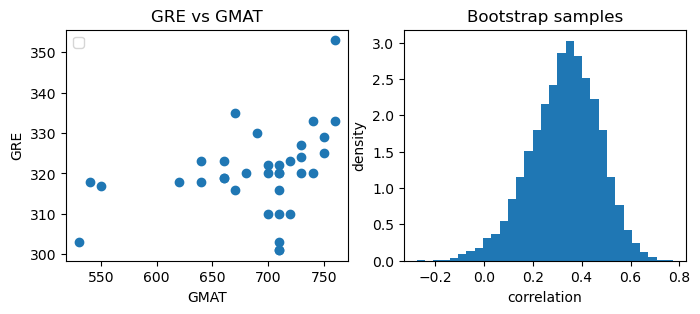

The confidence interval does not include 0, indicating GMAT and GRE scores have at least some correlation.
Nonetheless, the broad range of this interval points to considerable uncertainty regarding the precise magnitude of the correlation between these two standardized tests.
Therefore, the universities should prudently evaluate the option of accepting the GMAT as a substitute for the GRE, and conversely.


In [41]:
B = 10000
n = len(gmat)
bootstrap_sample_corr = np.zeros(B)

for i in range(B):
    # randomly choose the index
    bootstrap = np.random.choice(range(n), size=n, replace=True)
    # take the gmat and gre score of an applicant with the given index
    gmat_bootstrap = [gmat[p] for p in bootstrap]
    gre_bootstrap = [gre[q] for q in bootstrap]
    # calculate the bootstrap correlation for each iteration
    bootstrap_corr = np.corrcoef(gmat_bootstrap,gre_bootstrap)[0,1]
    bootstrap_sample_corr[i] = bootstrap_corr

# calculate the bootstrap standard error
bootstrap_se = bootstrap_sample_corr.std()
# calculate the 2.5 and 97.5 percetile value for bootstrap correlation sample
lower_bound_per = round(np.percentile(bootstrap_sample_corr,2.5),3)
upper_bound_per = round(np.percentile(bootstrap_sample_corr,97.5),3)

lower_bound_nor = round(corr_hat - norm.ppf(0.975) * bootstrap_se,3)
upper_bound_nor = round(corr_hat + norm.ppf(0.975) * bootstrap_se,3)

print("The Normal-based 95 percent confidence interval:",(lower_bound_nor,upper_bound_nor)) # normal
print("The Percentile 95 percent confidence interval:",(lower_bound_per,upper_bound_per)) # percentile
print("The Bootstrap Pivotal 95 percent confidence interval:",(round(2 * corr_hat - upper_bound_per,3),round(2 * corr_hat - 
                                                                                                             lower_bound_per,3))) # pivotal

fig, ax = plt.subplots(1,2,figsize = (8,3))
ax[0].set_title("GRE vs GMAT")
ax[0].scatter(gmat, gre)
ax[0].set_xlabel("GMAT")  # Use set_xlabel instead of xlabel
ax[0].set_ylabel("GRE")  # Use set_ylabel instead of ylabel
ax[0].legend()

ax[1].set_title("Bootstrap samples")
ax[1].set_xlabel("correlation") 
ax[1].set_ylabel("density") 
ax[1].hist(bootstrap_sample_corr,bins = int(1 + 3.3 * np.log(B)),density = True)
plt.show()

print("The confidence interval does not include 0, indicating GMAT and GRE scores have at least some correlation.")
print("Nonetheless, the broad range of this interval points to considerable uncertainty regarding the precise magnitude of the correlation between these two standardized tests.")
print("Therefore, the universities should prudently evaluate the option of accepting the GMAT as a substitute for the GRE, and conversely.")

#### (2). Hypothesis testing

###### Permutation Test - Compare the backgrounds of students applying to two different schools

In [42]:
# extract data for applicants who had both gre and gmat scores
df = query("select * from v_dataframe where gpa is not null")
# Pick out the information of applicants who applied to lehigh and wpi 
df_lehigh = df[df["app_school"]=="Lehigh University"]
df_WPI = df[df["app_school"]=="Worcester Polytechnic Institute"]

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19796\3553284621.py:46: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(SQL,connection)


In [43]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = data_1.mean() - data_2.mean()

    return diff

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

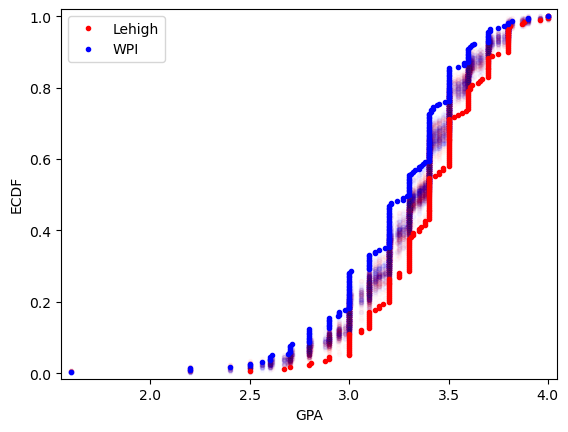

The ECDF plot distinctly illustrates a divergence in the GPA distributions for the two schools applicants. It is evident that Lehigh applicants display a generally higher GPA compared to those of WPI.


In [44]:
for i in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(df_lehigh["gpa"],df_WPI["gpa"])


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(df_lehigh["gpa"])
x_2, y_2 = ecdf(df_WPI["gpa"])
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red',label = "Lehigh")
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue',label = "WPI")

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('GPA')
_ = plt.ylabel('ECDF')
_ = plt.legend()
plt.show()
print("The ECDF plot distinctly illustrates a divergence in the GPA distributions for the two schools applicants. It is evident that Lehigh applicants display a generally higher GPA compared to those of WPI.")

p-value = 0.0
mean_diff: 0.16618345052737293


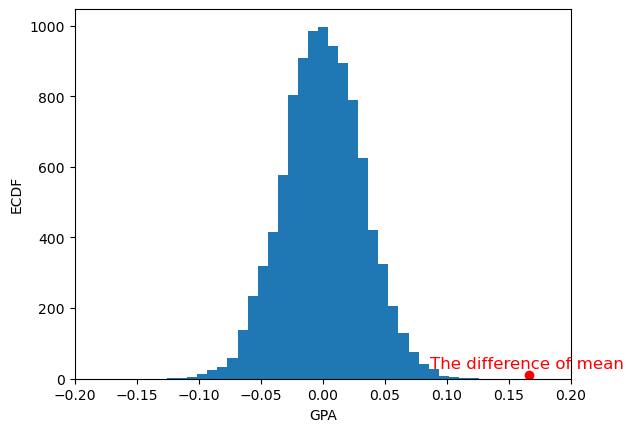

Although the p-value can not be exactly 0, it indicates none of the permutation replicates yielded a test statistic as extreme as the observed test statistic (mean_diff = 0.166). It offers robust evidence against the null hypothesis. Thus, we can confidently assert that applicants of Lehigh tend to have higher GPAs than those of WPI.


In [45]:
# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(df_lehigh["gpa"],df_WPI["gpa"])

# Draw 10,000 permutation replicates: perm_replicates
size = 10000
perm_replicates = draw_perm_reps(df_lehigh[df_lehigh["gpa"].notnull()]["gpa"], 
                                 df_WPI[df_WPI["gpa"].notnull()]["gpa"],
                                 diff_of_means, size=size)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)
print("mean_diff:" ,empirical_diff_means)
_ = plt.xlabel('GPA')
_ = plt.ylabel('ECDF')
_ = plt.xlim([-0.2,0.2])
plt.hist(perm_replicates,bins = int(1 + 3.322 * np.log(10000)))
plt.scatter([empirical_diff_means],[10],color = "red")
plt.text(empirical_diff_means-0.08, 30, "The difference of mean", fontsize=12, color='red')
plt.show()
print("Although the p-value can not be exactly 0, it indicates none of the permutation replicates yielded a test statistic as extreme as the observed test statistic (mean_diff = 0.166). It offers robust evidence against the null hypothesis. Thus, we can confidently assert that applicants of Lehigh tend to have higher GPAs than those of WPI.")

###### Wald Test - Examine the consequences of discontinuing the GRE requirement for applicants

In [46]:
# extract data from database
df = query("select * from v_dataframe_bu")
df_gre = df[pd.notnull(df["gre"])]
df_no_gre = df[pd.isnull(df["gre"])]

# calculate the W
X_bar = df_gre["gpa"].mean() 
Y_bar = df_no_gre["gpa"].mean()

s1_squared = df_gre["gpa"].var()
s2_squared = df_no_gre["gpa"].var()

m = df_gre.shape[0]
n = df_no_gre.shape[0]

delta_hat = X_bar - Y_bar
se_hat = math.sqrt(s1_squared/m + s2_squared/n)

W = (delta_hat - 0)/se_hat

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19796\3553284621.py:46: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(SQL,connection)


Whether W > Z-score: False
p-value: 0.1972248243269017


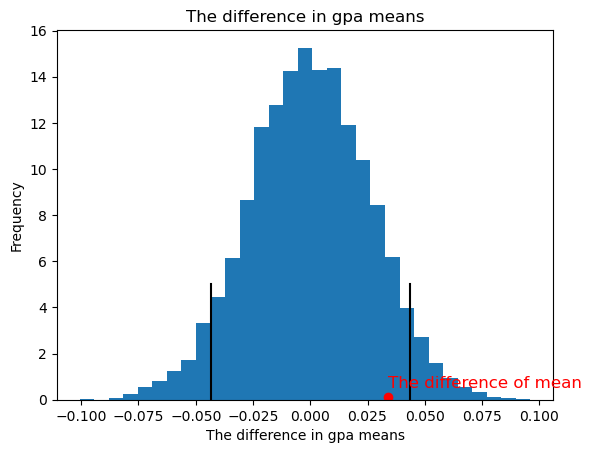

A higher p-value of 0.197 indicates the necessity to retain the null hypothesis, implying no significant difference in GPA between applicants with and without GRE scores.
This finding aligns with and supports Boston University decision.


In [47]:
# draw the distribution plot for the difference of gpa from two group of applicants
norm_diff = np.random.normal(0, se_hat, size=10000)

# determine whether absolute value of W is greater than Z score for 0.10 significance level
alpha = 0.10
z = norm.ppf(1 - alpha / 2)

lower_bound = 0 - z * se_hat
upper_bound = 0 + z * se_hat


print("Whether W > Z-score:",bool(abs(W)>z))
print("p-value:",2 * (1 - norm.cdf(abs(W))))

# calculate the bins according to Sturges’ Rule
bins = math.floor(1 + 3.3 * np.log(len(norm_diff)))

fig, ax = plt.subplots()  # Create a figure and an axes
ax.set_xlabel("The difference in gpa means")
ax.set_ylabel("Frequency")
ax.set_title(f"The difference in gpa means")
ax.plot([lower_bound,lower_bound],[0,5],color="black")
ax.plot([upper_bound,upper_bound],[0,5],color="black")
ax.hist(norm_diff,bins=bins, density=True)
ax.scatter([delta_hat],[0.1],color="red")
ax.text(delta_hat, 0.5, "The difference of mean", fontsize=12, color='red')
plt.show()
print("A higher p-value of 0.197 indicates the necessity to retain the null hypothesis, implying no significant difference in GPA between applicants with and without GRE scores.")
print("This finding aligns with and supports Boston University decision.")

In [48]:
# calculate the W
p1_hat = sum(df_gre["toefl"].dropna()>100)/len(df_gre["toefl"].dropna()>100)
p2_hat = sum(df_no_gre["toefl"].dropna()>100)/len(df_no_gre["toefl"].dropna()>100)

m = len(df_gre["toefl"].dropna()>100)
n = len(df_no_gre["toefl"].dropna()>100)


delta_hat = p1_hat - p2_hat
se_hat = math.sqrt(p1_hat * (1 - p1_hat)/m + p2_hat * (1 - p2_hat)/n)

W = (delta_hat - 0)/se_hat

Whether W > Z-score: True
p-value: 5.472620618895974e-06


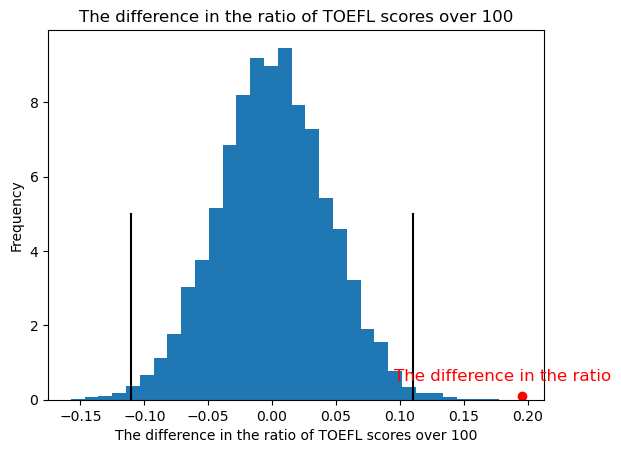

A very low p-value of 5e-06 provides strong evidence against the null hypothesis, leading us to confidently conclude that applicants without GRE scores have a significantly lower frequency of TOEFL scores above 100 compared to those with GRE scores.
This suggests that Boston University elimination of the GRE requirement might result in a rise in applicants with limited language proficiency.


In [49]:
# draw the distribution plot for the difference in the ratio of TOEFL scores over 100 from two group of applicants
norm_diff = np.random.normal(0, se_hat, size=10000)

alpha = 0.01
z = norm.ppf(1 - alpha / 2)
print("Whether W > Z-score:",bool(abs(W)>z))
print("p-value:",2 * (1 - norm.cdf(abs(W))))

lower_bound = 0 - z * se_hat
upper_bound = 0 + z * se_hat

# calculate the bins according to Sturges’ Rule
bins = math.floor(1 + 3.3 * np.log(len(norm_diff)))

fig, ax = plt.subplots()  # Create a figure and an axes
ax.set_xlabel("The difference in the ratio of TOEFL scores over 100")
ax.set_ylabel("Frequency")
ax.set_title(f"The difference in the ratio of TOEFL scores over 100")
ax.plot([lower_bound,lower_bound],[0,5],color="black")
ax.plot([upper_bound,upper_bound],[0,5],color="black")
ax.hist(norm_diff,bins=bins, density=True)
ax.scatter([delta_hat],[0.1],color="red")
ax.text(delta_hat-0.1, 0.5, "The difference in the ratio", fontsize=12, color='red')
plt.show()
print("A very low p-value of 5e-06 provides strong evidence against the null hypothesis, leading us to confidently conclude that applicants without GRE scores have a significantly lower frequency of TOEFL scores above 100 compared to those with GRE scores.")
print("This suggests that Boston University elimination of the GRE requirement might result in a rise in applicants with limited language proficiency.")

# 4. Data Modeling

In [50]:
# extract data from database
df = query("select * from v_dataframe where gpa<=4.0 and ranking is not null")
df_uni = query("select university,usnewsranking from m_university_name")
df.drop(["ielts"], axis=1, inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_19796\3553284621.py:46: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(SQL,connection)


In [51]:
df.head()

,id,gpa,undergrad_school,ranking,app_school,usnewsranking,gmat,gre,toefl
0,56291,3.44,哈尔滨工程大学,62,Northeastern University,53,NaN,NaN,95.0
1,56279,3.50,重庆大学,42,Northeastern University,53,NaN,320.0,95.0
2,56271,3.70,浙江大学,3,Northeastern University,53,NaN,320.0,100.0
3,56238,3.52,北京理工大学,30,Northeastern University,53,NaN,325.0,110.0
4,56237,2.75,北京大学,1,Northeastern University,53,NaN,NaN,105.0


In [52]:
# a function to train a bayesian linear regression model based different scores
def train_model(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    steps = [('polynomial_features', PolynomialFeatures(degree=2)),
             ('standard_scaler', StandardScaler()),
             ('bayesian_ridge', BayesianRidge())]

    pip = Pipeline(steps)
    pip.fit(X_train, y_train)
    
    y_train_pred = pip.predict(X_train)
    y_test_pred = pip.predict(X_test)
    
    model = pip.named_steps['bayesian_ridge']
    # standard error
    sigma = np.sqrt(1 / model.lambda_)

    print('train R2: {0:.3f}'.format(r2_score(y_train, y_train_pred)))
    print('test R2: {0:.3f}'.format(r2_score(y_test, y_test_pred)))
    print()

    return pip,sigma

In [53]:
# get the model for gre,gmat, only toefl, and only gpa
df_gre = df[["gpa","ranking","gre","toefl","usnewsranking"]].dropna()
X_gre = df_gre.iloc[:,:-1]
y_gre = df_gre.iloc[:,-1]
print("performance for gre model:")
model_gre,std_gre = train_model(X_gre,y_gre)

df_gmat = df[["gpa","ranking","gmat","toefl","usnewsranking"]].dropna()
X_gmat = df_gmat.iloc[:,:-1]
y_gmat = df_gmat.iloc[:,-1]
print("performance for gmat model:")
model_gmat,std_gmat = train_model(X_gmat,y_gmat)

df_toefl = df[["gpa","ranking","toefl","usnewsranking"]].dropna()
X_toefl = df_toefl.iloc[:,:-1]
y_toefl = df_toefl.iloc[:,-1]
print("performance for toefl model:")
model_toefl,std_toefl = train_model(X_toefl,y_toefl)

df_gpa = df[["gpa","ranking","usnewsranking"]].dropna()
X_gpa = df_gpa.iloc[:,:-1]
y_gpa = df_gpa.iloc[:,-1]
print("performance for gpa model:")
model_gpa,std_gpa = train_model(X_gpa,y_gpa)

# gmat is not a good indicator and gpa alone provide insufficient information

performance for gre model:
train R2: 0.340
test R2: 0.337

performance for gmat model:
train R2: 0.178
test R2: 0.254

performance for toefl model:
train R2: 0.289
test R2: 0.289

performance for gpa model:
train R2: 0.223
test R2: 0.217



In [54]:
# a function to get school suggestions
def get_school_selections(model,std,level,**score):
    warnings.filterwarnings('ignore')
    X = pd.DataFrame()
    for key,value in score.items():
        X[key] = [value]

    pred = model.predict(X)

    pred_draws = np.random.normal(pred, std, size=10000)

    z = norm.ppf(1 - (1 - level) / 2)
    lower_bound = pred[0] - z * std_gre
    upper_bound = pred[0] + z * std_gre

    # calculate the bins according to Sturges’ Rule
    bins = math.floor(1 + 3.3 * np.log(len(pred_draws)))

    fig, ax = plt.subplots()  # Create a figure and an axes
    ax.set_xlabel("The US News ranking of University")
    ax.set_ylabel("Frequency")
    ax.set_title(f"selection range of school based on ranking, with confidence level of {level * 100:.0f}% ",)
    ax.plot([lower_bound,lower_bound],[0,0.03],color="black")
    ax.plot([upper_bound,upper_bound],[0,0.03],color="black")
    ax.text(lower_bound, 0.01, math.ceil(lower_bound), fontsize=12, color='black')
    ax.text(upper_bound, 0.01, math.floor(upper_bound), fontsize=12, color='black')
    ax.hist(pred_draws,bins=bins, density=True)

    confidence_interval = (lower_bound,upper_bound)
    school_selection = [i[0] for i in df_uni.values if lower_bound<=i[1]<=upper_bound]

    return school_selection,confidence_interval,fig

# 5. Outcomes

In [55]:
# get school suggestions and school ranking range with gpa,toefl,ranking of undergraduate school in china
# student id = 56271
df[df["id"]==56271]

,id,gpa,undergrad_school,ranking,app_school,usnewsranking,gmat,gre,toefl
2,56271,3.7,浙江大学,3,Northeastern University,53,NaN,320.0,100.0
1921,56271,3.7,浙江大学,3,The Ohio State University,43,NaN,320.0,100.0
2676,56271,3.7,浙江大学,3,University of California San Diego,28,NaN,320.0,100.0
4049,56271,3.7,浙江大学,3,University of Southern California,28,NaN,320.0,100.0
5762,56271,3.7,浙江大学,3,University of Michigan--Ann Arbor,21,NaN,320.0,100.0


train R2: 0.344
test R2: 0.320

school selection: ['Dartmouth College', 'Vanderbilt University', 'University of Notre Dame', 'University of Michigan--Ann Arbor', 'Georgetown University', 'University of North Carolina at Chapel Hill', 'Carnegie Mellon University', 'Emory University', 'University of Virginia', 'Washington University in St. Louis', 'University of California Davis', 'University of California San Diego', 'University of Florida', 'University of Southern California', 'University of Texas at Austin', 'Georgia Institute of Technology', 'University of California Irvine', 'New York University', 'University of California Santa Barbara', 'University of Illinois Urbana-Champaign', 'University of Wisconsin--Madison', 'Boston College', 'Rutgers University--New Brunswick', 'Tufts University', 'University of Washington', 'Boston University', 'The Ohio State University', 'Purdue University--Main Campus', 'University of Maryland College Park', 'Lehigh University', 'University of Georgia',

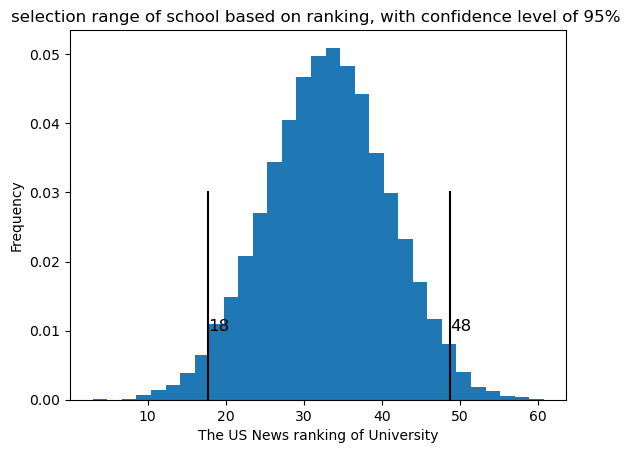

In [133]:
model_gre,std_gre = train_model(X_gre,y_gre)
school_list,itv,fig = get_school_selections(model_gre, std_gre, 0.95, gpa = 3.7, ranking = 3, gre = 320, toefl = 100)
print("school selection:", school_list)
print()
print("ranking interval:", itv)
fig.show()
print("Four of universities the student applied are covered by the predicted university list. The only exception is Northeastern University, which ranked 53, not far away from the lower bound of the predicted range (18,48). This suggests a favorable prediction outcome.")

train R2: 0.288
test R2: 0.294

school selection: ['Boston University', 'The Ohio State University', 'Purdue University--Main Campus', 'University of Maryland College Park', 'Lehigh University', 'University of Georgia', 'University of Rochester', 'Virginia Tech', 'Case Western Reserve University', 'Florida State University', 'Northeastern University', 'University of Minnesota Twin Cities', 'William & Mary', 'Stony Brook University--SUNY', 'University of Connecticut', 'Brandeis University', 'Michigan State University', 'North Carolina State University', 'The Pennsylvania State University--University Park', 'Rensselaer Polytechnic Institute', 'George Washington University', 'Syracuse University', 'University of Massachusetts--Amherst', 'University of Miami', 'University of Pittsburgh', 'Binghamton University--SUNY', 'Indiana University--Bloomington', 'Tulane University']

ranking interval: (42.984267177895454, 73.9403395442608)
All universities ranked above the interval rejected my appli

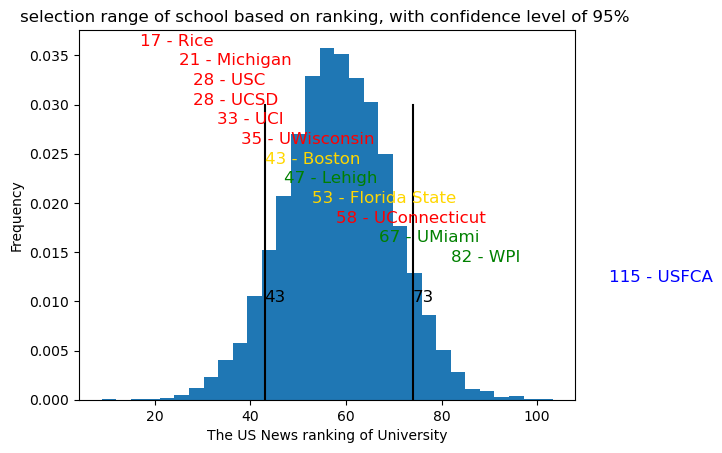

In [134]:
# get school suggestions and school ranking range with gpa,toefl,ranking of undergraduate school in china
# use gre mean to impute my gre
my_gre = df[(df["gpa"]==3.0) & (df["toefl"]>=95) & (df["toefl"]<100)]["gre"].mean()
# my education background
school_list,itv,fig = get_school_selections(model_gre, std_gre, 0.95, gpa = 3, ranking = 40, gre = my_gre , toefl = 97)

print("school selection:", school_list)
print()
print("ranking interval:", itv)
fig.show()

plt.text(17, 0.036, "17 - Rice", fontsize=12, color='red')
plt.text(25, 0.034, "21 - Michigan", fontsize=12, color='red')
plt.text(28, 0.032, "28 - USC", fontsize=12, color='red')
plt.text(28, 0.030, "28 - UCSD", fontsize=12, color='red')
plt.text(33, 0.028, "33 - UCI", fontsize=12, color='red')
plt.text(38, 0.026, "35 - UWisconsin", fontsize=12, color='red')
plt.text(43, 0.024, "43 - Boston", fontsize=12, color='#FFD700')
plt.text(47, 0.022, "47 - Lehigh", fontsize=12, color='green')
plt.text(53, 0.020, "53 - Florida State", fontsize=12, color='#FFD700')
plt.text(58, 0.018, "58 - UConnecticut", fontsize=12, color='red')
plt.text(67, 0.016, "67 - UMiami", fontsize=12, color='green')
plt.text(82, 0.014, "82 - WPI", fontsize=12, color='green')
plt.text(115, 0.012, "115 - USFCA", fontsize=12, color='blue')
print("All universities ranked above the interval rejected my applications.")
print("Most universities ranked within the interval offered me admission or placed me on the waitlist.")
print("All Universities below the interval offered admission or interview opportunities, but they were not appropriate for me.")
print("The outcome is informative since it is comparable to consultant's advice and can help applicant save expensive consulting fee.")